# Stacking model 
(Base model: XGBoost, Linear Regression; Metal model: Linear Regression)

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

### Function to implement Linear_Regression
(Base model: XGBoost, Linear Regression; Metal model: Linear Regression)

In [95]:
def stackingmodel_run(data, train, test):

    # Chọn các cột tính năng (feature) và mục tiêu (target)
    X_train = train.drop(['Sale', 'Date'], axis=1)
    y_train = train['Sale']
    X_test = test.drop(['Sale', 'Date'], axis=1)
    y_test = test['Sale']

    # Huấn luyện mô hình Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Huấn luyện mô hình XGBoost
    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_train, y_train)

    # Tạo mô hình Stacking
    estimators = [('linear', lr_model), ('xgboost', xgb_model)]
    stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
    stacking_model.fit(X_train, y_train)

    # Scale dữ liệu đầu vào
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Huấn luyện lại mô hình stacking với dữ liệu đã scale
    stacking_model.fit(X_train_scaled, y_train)

    # Dự đoán trên tập dữ liệu thử nghiệm
    stacking_predictions_test_scaled = stacking_model.predict(X_test_scaled)

    # Tạo DataFrame cho dự đoán của tập thử nghiệm
    test_predictions_scaled = pd.DataFrame({
        'Date': test['Date'],
        'Sale': stacking_predictions_test_scaled
    })

    # Dự đoán giá trị tương lai bằng mô hình stacking
    future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=90, freq='D')
    future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month, 'Day': future_dates.day})
    future_features_scaled = scaler.transform(future_features)
    future_predictions_scaled = stacking_model.predict(future_features_scaled)

    # Tạo DataFrame cho dự đoán tương lai
    future_data_scaled = pd.DataFrame({'Date': future_dates, 'Sale': future_predictions_scaled})

    # Vẽ biểu đồ
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Sale'], label='Actual Sales')
    plt.plot(test['Date'], test['Sale'], label='Test Data')
    plt.plot(test_predictions_scaled['Date'], test_predictions_scaled['Sale'], label='Test Predictions', linestyle='-')
    plt.plot(future_data_scaled['Date'], future_data_scaled['Sale'], label='Next 90 days', linestyle='-')
    
    # Phân chia dự đoán thành các đoạn 30, 60, và 90 ngày với màu khác nhau
    plt.plot(future_data_scaled['Date'][:30], future_data_scaled['Sale'][:30], label='Next 30 days', linestyle='-', color='blue')
    plt.plot(future_data_scaled['Date'][30:60], future_data_scaled['Sale'][30:60], label='Next 60 days', linestyle='-', color='yellow')
    plt.plot(future_data_scaled['Date'][60:], future_data_scaled['Sale'][60:], label='Next 90 days', linestyle='-', color='red')

    plt.xlabel('Date')
    plt.ylabel('Sale Value')
    plt.title('Sales Prediction')
    plt.legend()
    plt.show()

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions_test_scaled))

    # Tính toán MAE
    mae = mean_absolute_error(y_test, stacking_predictions_test_scaled)

    # Tính toán MAPE
    def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape = mean_absolute_percentage_error(y_test, stacking_predictions_test_scaled)

    print("RMSE:", rmse)
    print("MAPE:", mape)
    print("MAE:", mae)

# EUR_VND

In [96]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('EUR.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Loại bỏ 2 cột Purchase và Transfer
data.drop(['Purchase', 'Transfer'], axis=1, inplace=True)


EUR_7:3

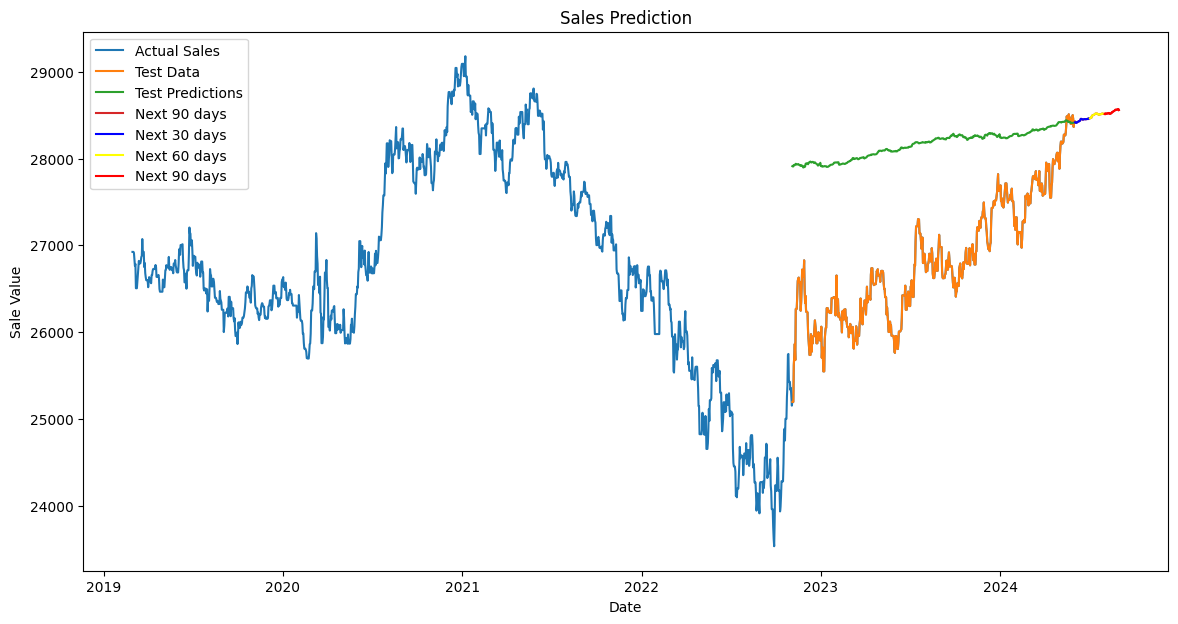

RMSE: 1443.3834815284065
MAPE: 4.9906270341224195
MAE: 1323.6730612345652


In [97]:
train, test = train_test_split(data, test_size=0.3, shuffle=False)

stackingmodel_run(data,train,test)

EUR_8:2

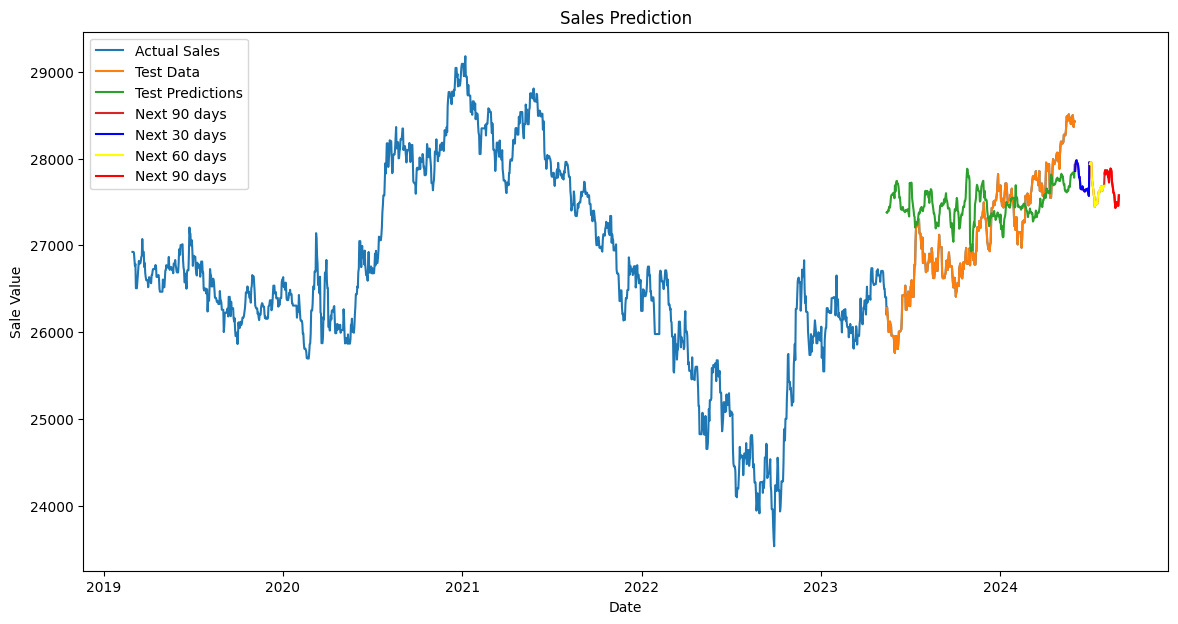

RMSE: 698.0750382586099
MAPE: 2.0663512401564543
MAE: 553.8248195375933


In [98]:
train, test = train_test_split(data, test_size=0.2, shuffle=False)

stackingmodel_run(data,train,test)

EUR_9:1

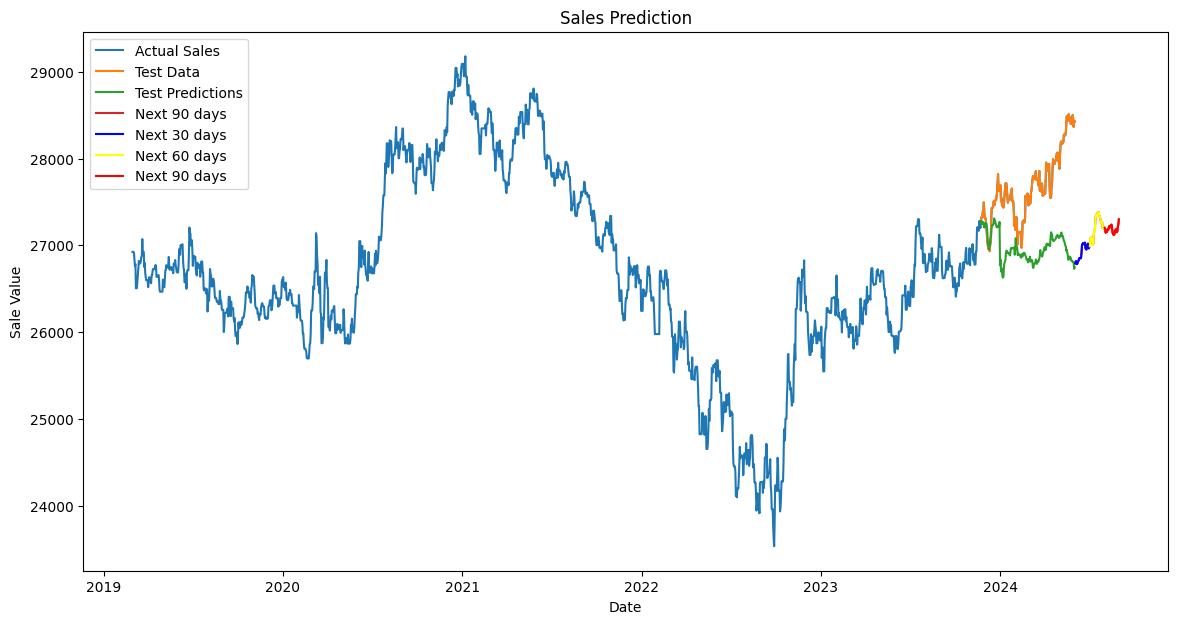

RMSE: 822.1913483104455
MAPE: 2.510661926552937
MAE: 700.1793821873149


In [99]:
train, test = train_test_split(data, test_size=0.1, shuffle=False)

stackingmodel_run(data,train,test)

# GBP_VND

In [100]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('GBP.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop(['Purchase', 'Transfer'], axis=1, inplace=True)

GBP_7:3

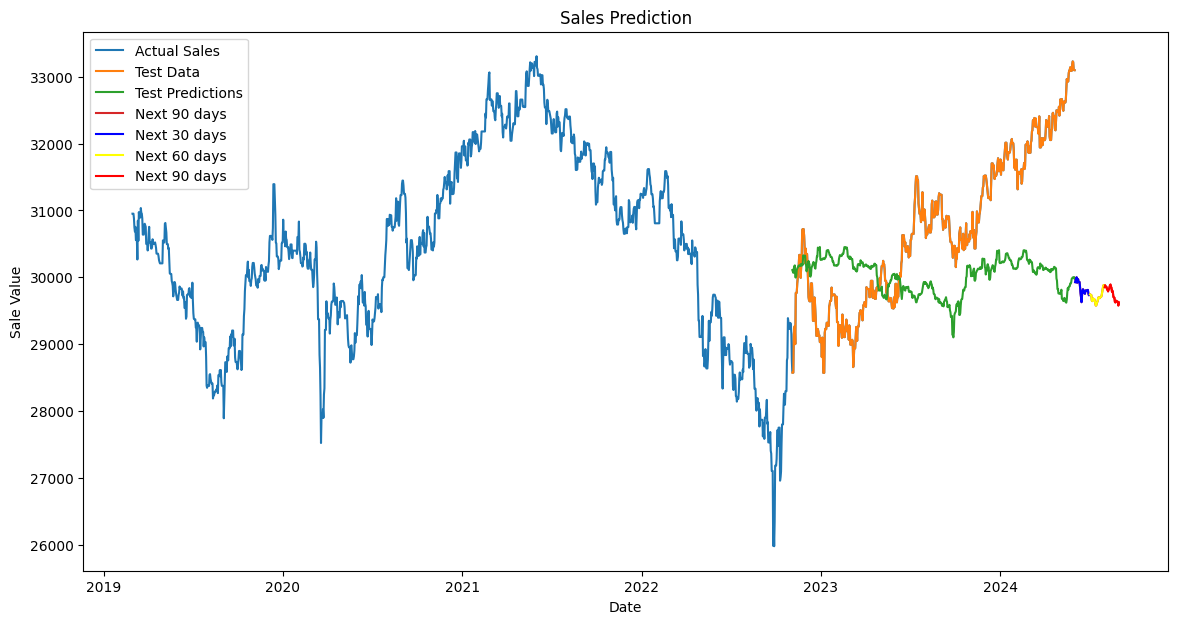

RMSE: 1373.3373030117673
MAPE: 3.7188680533741136
MAE: 1160.1023174933787


In [101]:
train, test = train_test_split(data, test_size=0.3, shuffle=False)

stackingmodel_run(data,train,test)

GBP_8:2

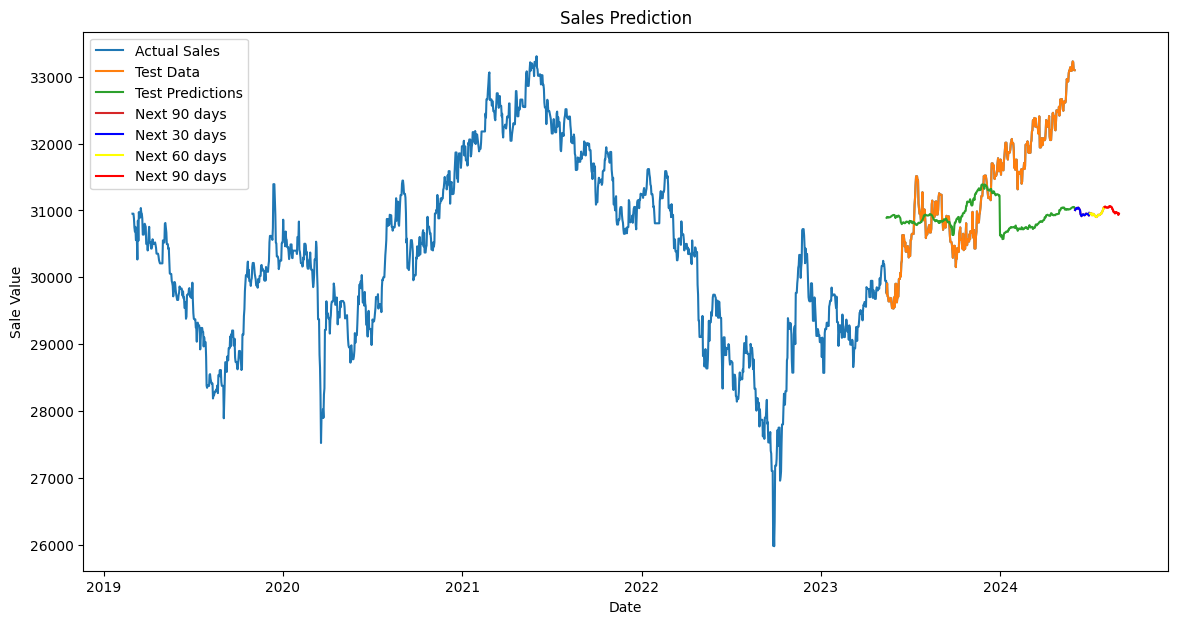

RMSE: 967.1655405100074
MAPE: 2.46581233434897
MAE: 780.6872320007406


In [102]:
train, test = train_test_split(data, test_size=0.2, shuffle=False)

stackingmodel_run(data,train,test)

GBP_9:1

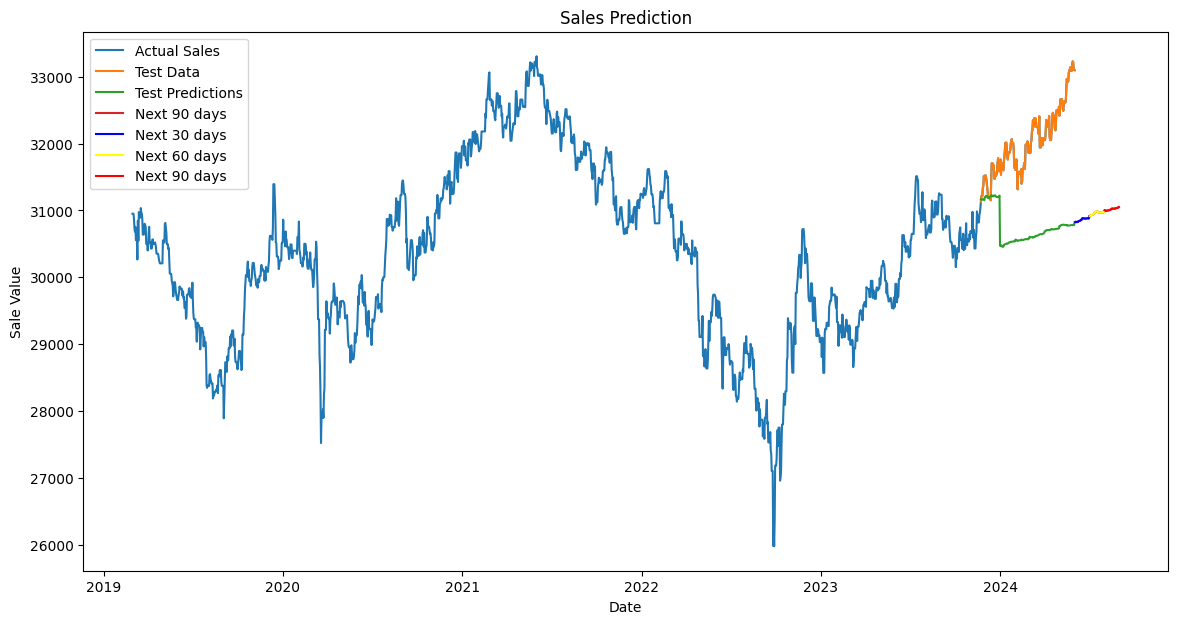

RMSE: 1416.9774827732786
MAPE: 3.9572306814341642
MAE: 1276.0060646538768


In [103]:
train, test = train_test_split(data, test_size=0.1, shuffle=False)

stackingmodel_run(data,train,test)

# JPY_VND

In [104]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('JPY.csv')

# Xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].astype(str).str.replace(',', '').astype(float)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop(['Purchase', 'Transfer'], axis=1, inplace=True)

JPY_7:3

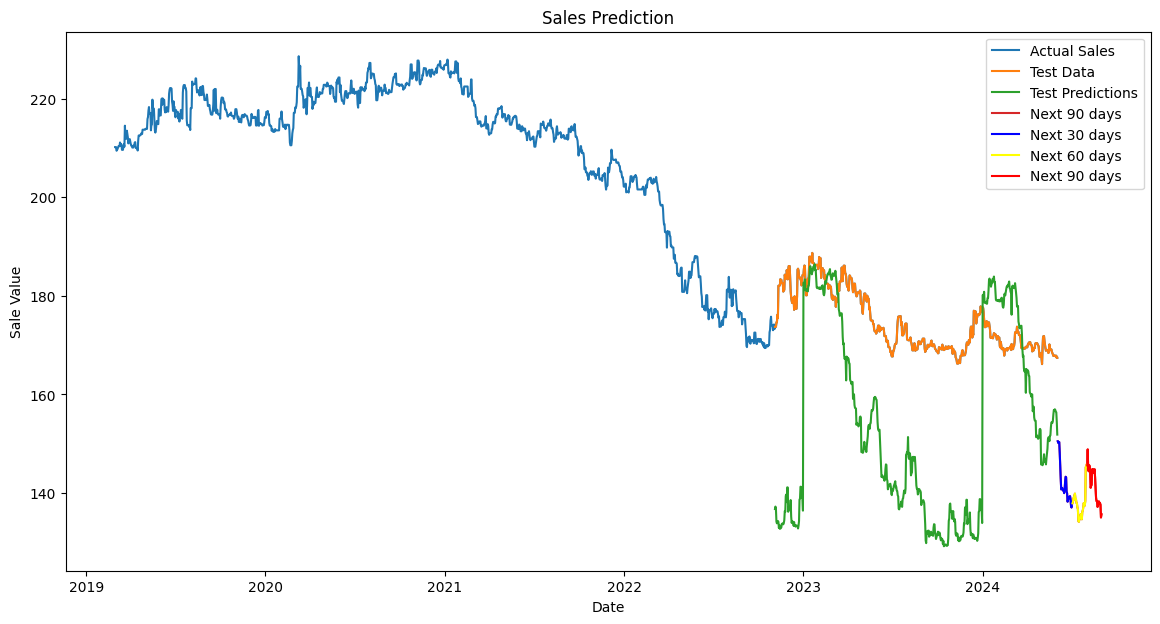

RMSE: 27.438256648970164
MAPE: 13.325560232331199
MAE: 23.189728728063912


In [105]:
train, test = train_test_split(data, test_size=0.3, shuffle=False)

stackingmodel_run(data,train,test)

JPY_8:2

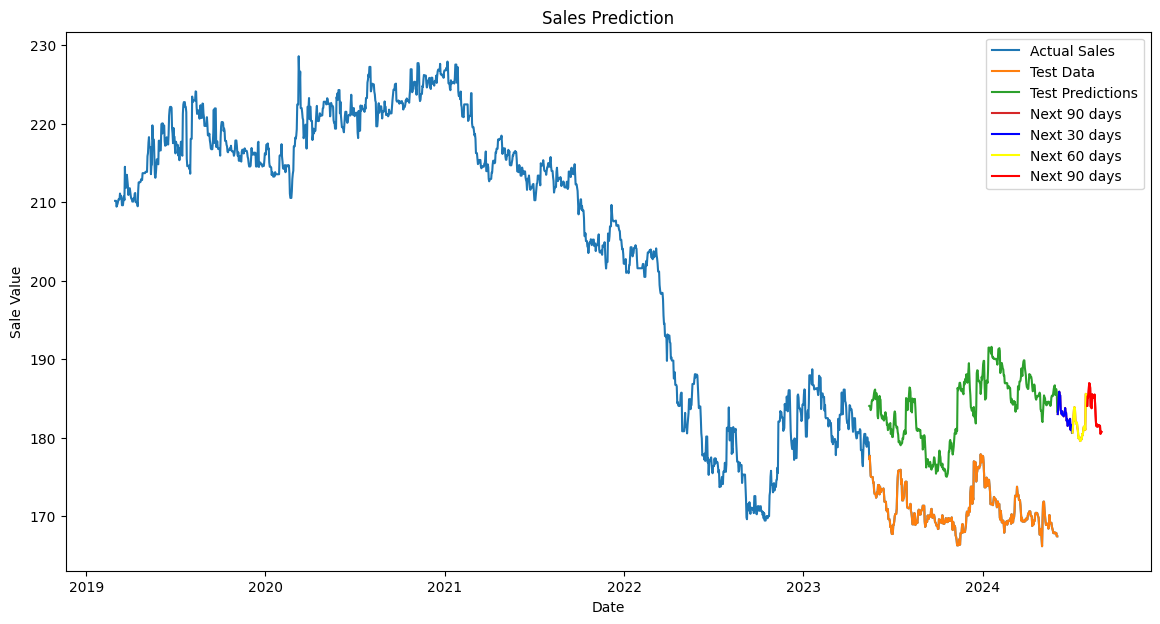

RMSE: 13.68050472922467
MAPE: 7.594719250939708
MAE: 12.94580760907825


In [106]:
train, test = train_test_split(data, test_size=0.2, shuffle=False)

stackingmodel_run(data,train,test)

JPY_9:1

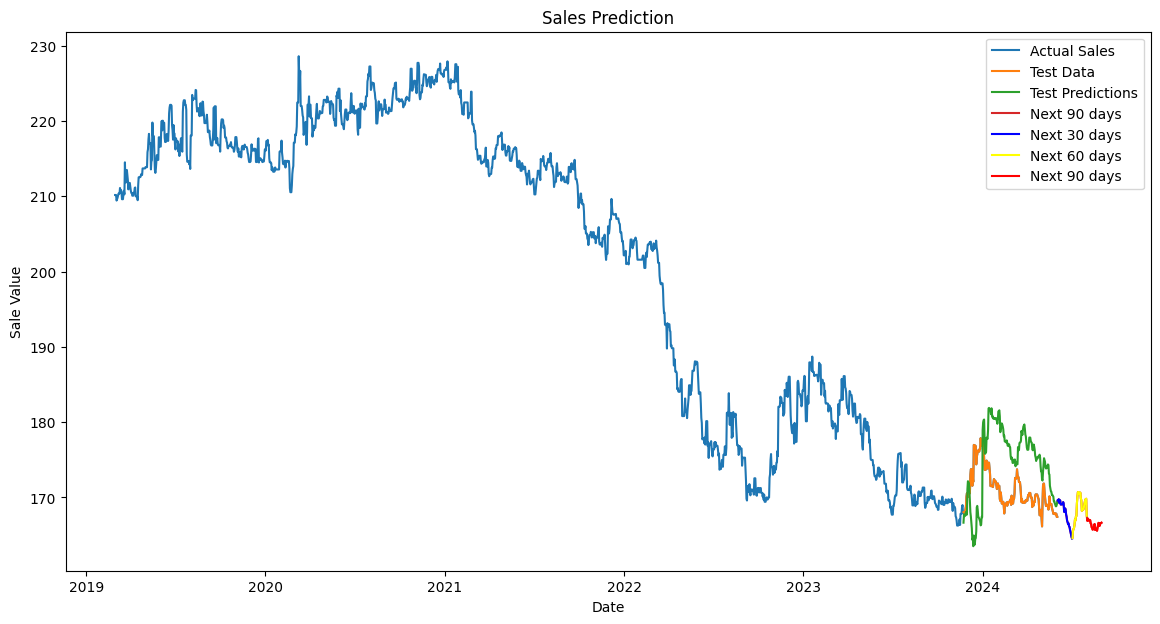

RMSE: 6.8856627691783965
MAPE: 3.5767645703626663
MAE: 6.126875207517845


In [107]:
train, test = train_test_split(data, test_size=0.1, shuffle=False)

stackingmodel_run(data,train,test)